In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [5]:
dataset= ("./data/WIne data red and white.csv")
data = pd.read_csv(dataset)

In [6]:

data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [8]:
data.keys()

Index(['Type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [9]:
print(data.columns.tolist())

['Type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [10]:
columns = data.columns.tolist()
columns.pop(len(columns)-1)
columns

['Type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [11]:
# Fit the model to the data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
predicted_clusters = kmeans.predict(data)
print(predicted_clusters)

[0 2 1 ... 4 4 4]


In [13]:
data['cluster_data'] = predicted_clusters.tolist()
data['cluster_data']
data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_data
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3


In [14]:
data.to_csv("output.csv", index=False, header=True)

Text(30.4554,0.5,'fixed acidity')

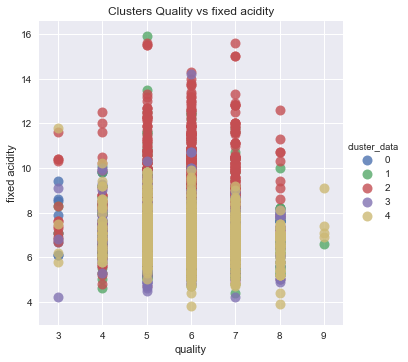

In [111]:
sns.lmplot('quality', 'fixed acidity',
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs fixed acidity')
plt.xlabel('quality')
plt.ylabel('fixed acidity')

Text(31.7586,0.5,'citric acid')

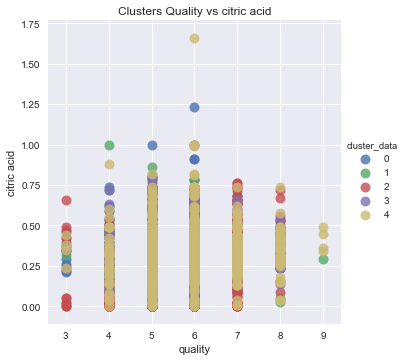

In [112]:
sns.lmplot('quality', 'citric acid',
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs citric acid')
plt.xlabel('quality')
plt.ylabel('citric acid')

Text(30.3802,0.5,'residual sugar')

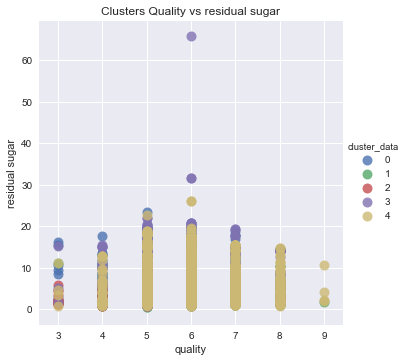

In [113]:
sns.lmplot('quality', 'residual sugar',
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs residual sugar')
plt.xlabel('quality')
plt.ylabel('residual sugar')

Text(30.8328,0.5,'chlorides')

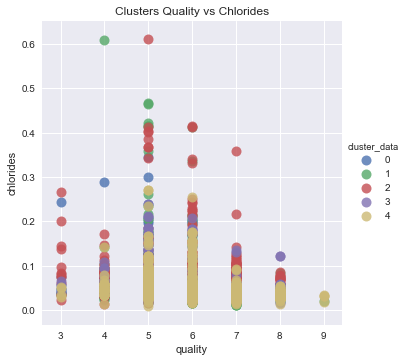

In [114]:
sns.lmplot('quality', 'chlorides', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs Chlorides')
plt.xlabel('quality')
plt.ylabel('chlorides')

Text(31.2854,0.5,'free sulfur dioxide')

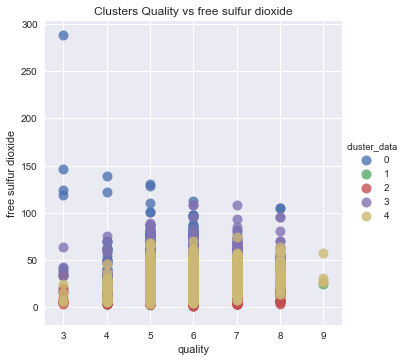

In [115]:
sns.lmplot('quality', 'free sulfur dioxide', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs free sulfur dioxide')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')

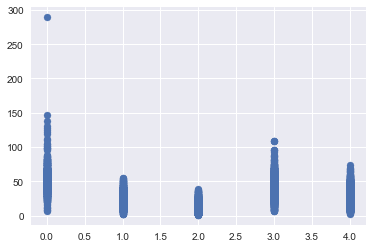

In [116]:
plt.scatter(data['cluster_data'], data['free sulfur dioxide'])
plt.show()

Text(31.2854,0.5,'total sulfur dioxide')

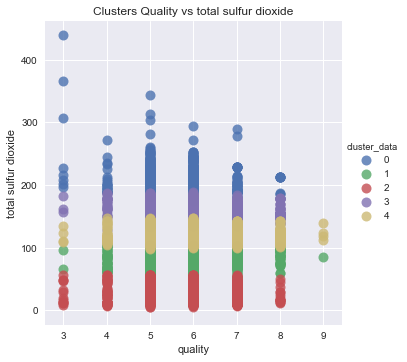

In [117]:
sns.lmplot('quality', 'total sulfur dioxide', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs total sulfur dioxide')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')

Text(31.8132,0.5,'density')

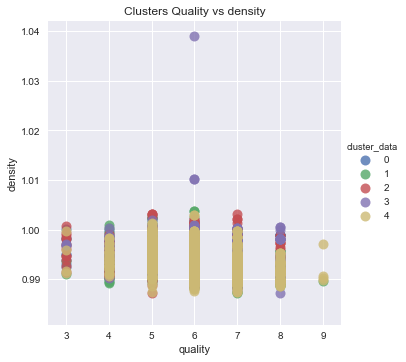

In [118]:
sns.lmplot('quality', 'density', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs density')
plt.xlabel('quality')
plt.ylabel('density')

Text(30.8534,0.5,'pH')

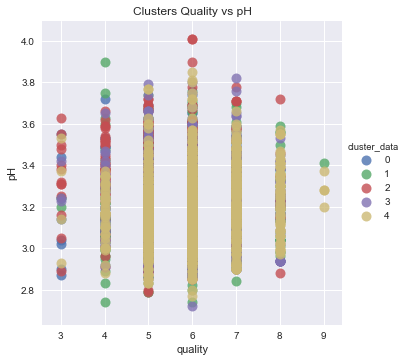

In [119]:
sns.lmplot('quality', 'pH', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs pH')
plt.xlabel('quality')
plt.ylabel('pH')

Text(31.8132,0.5,'sulphates')

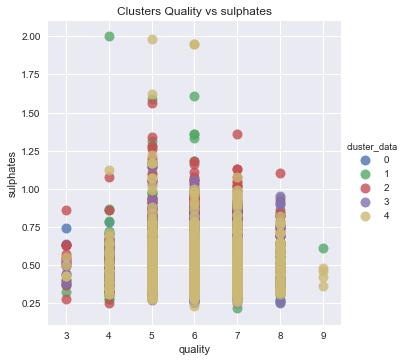

In [120]:
sns.lmplot('quality', 'sulphates', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs sulphates')
plt.xlabel('quality')
plt.ylabel('sulphates')

Text(30.4008,0.5,'alcohol')

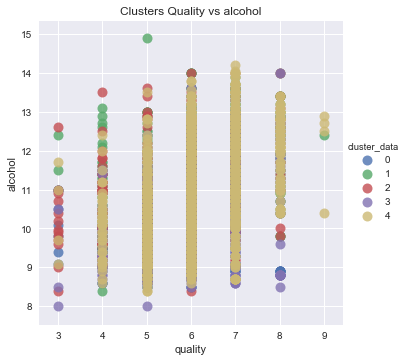

In [121]:
sns.lmplot('quality', 'alcohol', 
           data=data, 
           fit_reg=False, 
           hue="cluster_data",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Quality vs alcohol')
plt.xlabel('quality')
plt.ylabel('alcohol')

In [122]:
columns = data.columns.tolist()
columns.pop(len(columns)-1)
columns

['Type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

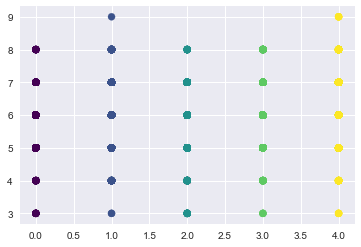

In [123]:
plt.scatter(data['cluster_data'], data['quality'], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [124]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labels

array([3, 4, 1, ..., 2, 2, 2])

In [125]:
centers

array([[9.97382199e-01, 6.98442408e+00, 2.96505236e-01, 3.57709424e-01,
        9.67074607e+00, 5.23062827e-02, 5.26956806e+01, 2.06879581e+02,
        9.96531041e-01, 3.17695026e+00, 5.17578534e-01, 9.62118237e+00,
        5.54973822e+00, 1.60209424e+00],
       [7.17357911e-01, 7.14285714e+00, 3.51048387e-01, 3.02043011e-01,
        3.35203533e+00, 5.50614439e-02, 2.25053763e+01, 8.33371736e+01,
        9.93339101e-01, 3.22086022e+00, 5.27526882e-01, 1.09458653e+01,
        5.87864823e+00, 2.73195084e+00],
       [5.82278481e-02, 8.36396624e+00, 5.05603376e-01, 2.70886076e-01,
        2.46270042e+00, 8.28101266e-02, 1.15565401e+01, 2.95181435e+01,
        9.96389485e-01, 3.30367932e+00, 6.41662447e-01, 1.05811111e+01,
        5.69957806e+00, 2.93502110e+00],
       [9.87030717e-01, 6.92211604e+00, 2.81976109e-01, 3.44832765e-01,
        7.71423208e+00, 4.97460751e-02, 4.22716724e+01, 1.59965188e+02,
        9.95131549e-01, 3.19453925e+00, 4.96047782e-01, 1.01225575e+01,
        5.791

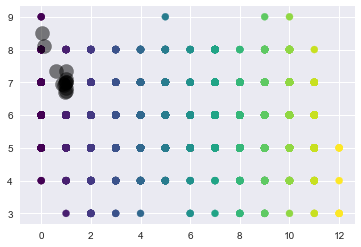

In [85]:
plt.scatter(data['cluster_data'], data['quality'], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()